In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reading Data

In [264]:
train_origin = pd.read_csv("./data/creditcard_train.csv")
test_origin  = pd.read_csv("./data/creditcard_test.csv")

# Evaluating data

In [265]:
train_origin.head()

Id  Time        V1        V2        V3        V4        V5        V6  \
0   0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1   1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2   2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3   3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4   4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8  ...         V21       V22       V23       V24  \
0  0.239599  0.098698  ...   -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436  ...   -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 32 columns]

In [266]:
test_origin.head()

Id  Time        V1        V2        V3        V4        V5        V6  \
0  11    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
1  17    13 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
2  18    14 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
3  20    16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
4  27    23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   

         V7        V8   ...         V20       V21       V22       V23  \
0  0.470455  0.538247   ...    0.125992  0.049924  0.238422  0.009130   
1  0.707642  0.087962   ...   -0.047021 -0.194796 -0.672638 -0.156858   
2 -1.559738  0.160842   ...   -2.196848 -0.503600  0.984460  2.458589   
3 -0.878586  0.445290   ...   -0.138334 -0.295583 -0.571955 -0.050881   
4 -0.264905 -0.220982   ...   -0.522951 -0.284376 -0.323357 -0.037710   

        V24       V25       V26       V27       V28  Amount  
0  0.996710 -0.767315 -0.492208  0.042472 -0.054337    9.99  
1 -0.888386 -0.342413 -0.049027  0.079692  0.131024    0.89  
2  0.042119 -0.481631 -0.621272  0.392053  0.949594   46.80  
3 -0.304215  0.072001 -0.422234  0.086553  0.063499  231.71  
4  0.347151  0.559639 -0.280158  0.042335  0.028822   16.00  

[5 rows x 31 columns]

In [267]:
train_origin.columns

Index(['Id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [268]:
print(train_origin.isnull().values.any())
print(test_origin.isnull().values.any())

False
False


In [269]:
train_origin.dtypes

Id          int64
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [270]:
test_origin.dtypes

Id          int64
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [271]:
train_origin.Class.value_counts(normalize=True)

0    0.998266
1    0.001734
Name: Class, dtype: float64

#regular transaction is too much more than frauds, now we need to balance the data

In [272]:
train_origin.shape

(227789, 32)

# Preprocessiong Data

-- Drop the column 0 which is id

In [273]:
train = train_origin.drop(["Id"], axis = 1)
test  = test_origin.drop(["Id"], axis = 1)
train.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [274]:
test.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
1    13 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867  0.707642   
2    14 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406 -1.559738   
3    16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109 -0.878586   
4    23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083 -0.264905   

         V8        V9   ...         V20       V21       V22       V23  \
0  0.538247 -0.558895   ...    0.125992  0.049924  0.238422  0.009130   
1  0.087962 -0.665271   ...   -0.047021 -0.194796 -0.672638 -0.156858   
2  0.160842  1.233090   ...   -2.196848 -0.503600  0.984460  2.458589   
3  0.445290 -0.446196   ...   -0.138334 -0.295583 -0.571955 -0.050881   
4 -0.220982 -1.071425   ...   -0.522951 -0.284376 -0.323357 -0.037710   

        V24       V25       V26       V27       V28  Amount  
0  0.996710 -0.767315 -0.492208  0.042472 -0.054337    9.99  
1 -0.888386 -0.342413 -0.049027  0.079692  0.131024    0.89  
2  0.042119 -0.481631 -0.621272  0.392053  0.949594   46.80  
3 -0.304215  0.072001 -0.422234  0.086553  0.063499  231.71  
4  0.347151  0.559639 -0.280158  0.042335  0.028822   16.00  

[5 rows x 30 columns]

-- Balancing data, as the safe transactions and frauds were extemely unbalanced

In [275]:
bad_ones  = train[train.Class == 1 ]
safe_ones = train[train.Class == 0 ]

percentage = len(bad_ones)/float(len(safe_ones))

sampled_safe_ones = safe_ones.sample(frac=percentage, random_state = 33)
print(bad_ones.shape, sampled_safe_ones.shape, sep = ",")

(395, 31),(395, 31)


In [276]:
train_after_balancing = pd.concat([bad_ones, sampled_safe_ones], axis = 0)
train_after_balancing.shape

(790, 31)

# Splitting the train data set to training set and validation set 

In [277]:
X = train_after_balancing[train_after_balancing.columns[:30]]
y = train_after_balancing.Class
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [278]:
print( xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, sep=",")

(632, 30),(158, 30),(632,),(158,)


In [279]:
xtrain.head()

Time         V1         V2         V3        V4         V5  \
223295  168685  -0.947514   1.131611   1.788215 -0.365021  -0.388738   
98950    77033  -1.484256   0.170129   0.176916 -1.448256   1.614919   
80123    67439  -0.690637   1.342271   1.498129  2.049774   1.055691   
120403   93920 -12.381048   8.213022 -16.962530  7.116091  -9.772826   
120653   94362 -26.457745  16.497472 -30.177317  8.904157 -17.892600   

              V6         V7         V8        V9   ...         V20       V21  \
223295 -0.412050   0.199488   0.427393 -0.182131   ...   -0.092404 -0.128906   
98950   3.976547  -1.286745   0.711297  0.436589   ...   -0.294139  0.585337   
80123   0.677197   0.855445  -0.467242 -0.681576   ...    0.030868  0.110939   
120403 -3.666836 -16.147363   2.078706 -4.250657   ...    0.537795  0.167703   
120653 -1.227904 -31.197329 -11.438920 -9.462573   ...    2.812241 -8.755698   

             V22       V23       V24       V25       V26       V27       V28  \
223295 -0.418838 -0.215451  0.027913  0.345553 -0.418546 -0.044560  0.014648   
98950  -0.806886 -0.212734  1.088089 -0.258456  0.907279 -0.014595 -0.120767   
80123   0.453065 -0.355346 -0.771072 -0.358505  0.101309 -0.849084 -0.312999   
120403  1.503413 -0.767755  0.371951 -1.415639 -0.517022 -0.434621  0.292721   
120653  3.460893  0.896538  0.254836 -0.738097 -0.966564 -7.263482 -1.324884   

        Amount  
223295    5.49  
98950    28.56  
80123     0.00  
120403   97.00  
120653    1.00  

[5 rows x 30 columns]

In [280]:
ytrain.head()

223295    0
98950     0
80123     0
120403    1
120653    1
Name: Class, dtype: int64

# Now data is ready for different models

# 1.  Decision tree

In [224]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [225]:
prediction_DT_on_validation_set = model_DT.predict(xtest)

In [226]:
print(accuracy_score(ytest, prediction_DT_on_validation_set))
print(classification_report(ytest, prediction_DT_on_validation_set))
print(confusion_matrix(ytest, prediction_DT_on_validation_set))

0.9177215189873418
             precision    recall  f1-score   support

          0       0.92      0.91      0.92        80
          1       0.91      0.92      0.92        78

avg / total       0.92      0.92      0.92       158

[[73  7]
 [ 6 72]]


Cross validation with different max_depth of tree

In [227]:
depthRange = range(1, 50)
scores_DT = []
for i in depthRange:
    model_DT_w_depth = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    #model_w_depth.fit(xtrain, ytrain)
    score = cross_val_score(model_DT_w_depth,
                           X,
                           y,
                           cv = 5, 
                           scoring = "f1")
    scores_DT.append(score.mean())
print(*scores_DT, sep="\n")

0.9159344571302588
0.9098354960712903
0.9070879513896264
0.9213428097239337
0.9171283913721385
0.9020991193418038
0.9054264278437409
0.8948727455930359
0.9062720399596144
0.9023580528808928
0.9020777921658129
0.9069328987862295
0.9025859555126603
0.8924020017346865
0.9000497914289406
0.9049734575689745
0.8975547783058883
0.9024409961033923
0.9020899837394362
0.9035223223302733
0.8979375432972974
0.8940260733485141
0.9060444994547444
0.9080383903913674
0.8986852910485006
0.8987979930651955
0.8993414110995378
0.900169878430748
0.9057936002033232
0.9004945274329197
0.8975086526573559
0.899138091123217
0.9002887105260745
0.899858390669295
0.9009446093834281
0.9007971607038623
0.9035618584082699
0.9050614881239627
0.904909780996759
0.9009685854868306
0.9009737682067666
0.9072152515351742
0.9033349776742787
0.907307886208895
0.9024510541227755
0.8999638601439083
0.9033211200860375
0.9034137451858971
0.9014699232005929


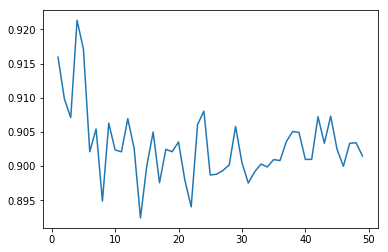

In [228]:
plt.plot(depthRange, scores_DT)

In [229]:
scores_DT.index(max(scores_DT)) + 1

4

#now we have the best max_depth, train the model again

In [230]:
model_DT_depth_4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [231]:
model_DT_depth_4.fit(X, y)
result_DT = model_DT_depth_4.predict(test)
print(result_DT)

[0 0 0 ... 0 0 0]


(array([54948.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2070.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

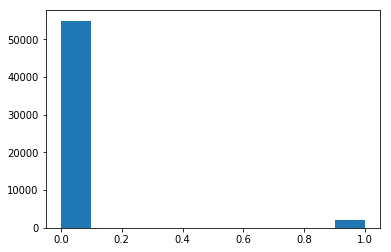

In [232]:
plt.hist(result_DT)

In [294]:
submission_DT = pd.DataFrame({"Id": test_origin.Id[result_DT==1], "Class": 1})
submission_DT.to_csv("submission_decision_tree.csv", columns=["Id", "Class"], header = True, index = False)

# 2. Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression 

In [234]:
model_LR = LogisticRegression()
model_LR.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [235]:
prediction_LR_on_validation_set = model_LR.predict(xtest)

In [236]:
print(accuracy_score(ytest, prediction_LR_on_validation_set))
print(classification_report(ytest,prediction_LR_on_validation_set))
print(confusion_matrix(ytest, prediction_LR_on_validation_set))

0.9240506329113924
             precision    recall  f1-score   support

          0       0.90      0.96      0.93        80
          1       0.96      0.88      0.92        78

avg / total       0.93      0.92      0.92       158

[[77  3]
 [ 9 69]]


Cross validation with different R

In [239]:
expRange = range(-5, 6)
scores_LR = []
for i in expRange:
    r = 10**i
    model_RT_with_C=LogisticRegression(C=r)
    score = cross_val_score(model_RT_with_C,
                           X,
                           y,
                           cv=5,
                           scoring = "f1")
    scores_LR.append(score.mean())
print(*scores_LR, sep="\n")

0.650212052757065
0.7940092215407251
0.8873613561761868
0.9214643251619623
0.9263765193174864
0.922368797749084
0.918186816208612
0.9194091233132721
0.9248044024440325
0.9248044024440325
0.9248044024440325


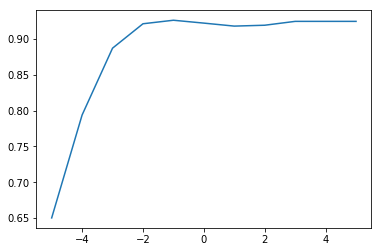

In [240]:
plt.plot(expRange, scores_LR)

In [242]:
scores_LR.index(max(scores_LR)) - 5

-1

In [243]:
model_LR_C_point1 = LogisticRegression(C=0.1)
model_LR_C_point1.fit(X, y)
result_LR = model_LR_C_point1.predict(test)

(array([55657.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1361.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

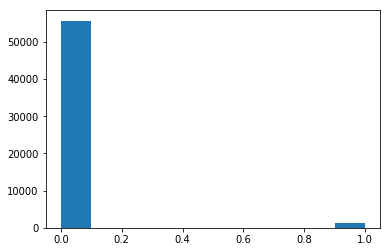

In [244]:
plt.hist(result_LR)

In [295]:
submission_LR = pd.DataFrame({"Id": test_origin.Id[result_LR==1], "Class": 1})
submission_LR.to_csv("submission_logistic_regression.csv", columns=["Id", "Class"], header = True, index = False)

# 3. Naive Bayes
Use Gaussian Bayes model

In [245]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(xtrain, ytrain)
prediction_NB_on_validation_set = model_NB.predict(xtest)

In [249]:
print(accuracy_score(ytest, prediction_NB_on_validation_set))
print(classification_report(ytest, prediction_NB_on_validation_set))
print(confusion_matrix(ytest, prediction_NB_on_validation_set))

0.9113924050632911
             precision    recall  f1-score   support

          0       0.87      0.97      0.92        80
          1       0.97      0.85      0.90        78

avg / total       0.92      0.91      0.91       158

[[78  2]
 [12 66]]


In [250]:
result_NB = model_NB.predict(test)

(array([56194.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   824.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

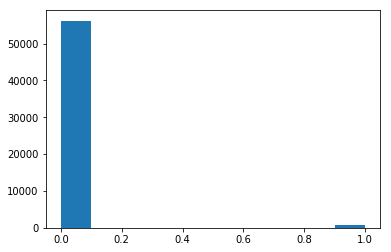

In [251]:
plt.hist(result_NB)

In [296]:
submission_NB = pd.DataFrame({"Id": test_origin.Id[result_NB==1], "Class": 1})
submission_NB.to_csv("submission_Naive_Bayes.csv", columns=["Id", "Class"], header = True, index = False)

# Conclusion:

In [256]:
print(" For this data set: \n")
print(" The best f1 score of Decision Tree is       " + str(max(scores_DT)))
print(" The best f1 score of Logistic Regression is " + str(max(scores_LR)))
print(" The f1 score of Decision Tree is            " + str(0.9))

 For this data set: 

 The best f1 score of Decision Tree is       0.9213428097239337
 The best f1 score of Logistic Regression is 0.9263765193174864
 The f1 score of Decision Tree is            0.9
